In [1]:
import os
os.chdir('../')
import os.path as op
import mne

# run this script in the study dir
from scripts.config import baseline, meg_dir, subjects_dir

# change to qt for interactive plots
%matplotlib inline

Reading /home/yuhan/Project/from-zero-to-source-estimates/MEG/grand_average-ave.fif ...
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (aud_left)
        0 CTF compensation matrices available
        nave = 52 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (aud_right)
        0 CTF compensation matrices available
        nave = 58 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (vis_left)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
    Found the data of interest:
        t =    -199.80 ...     49

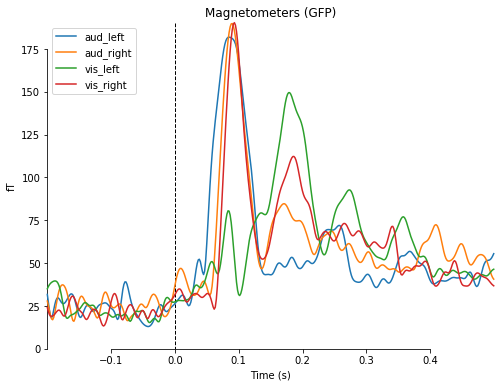

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


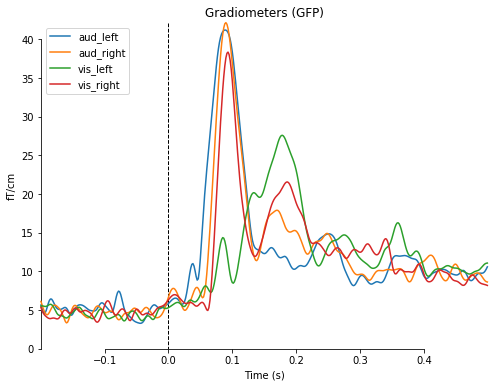

[<Figure size 576x432 with 1 Axes>, <Figure size 576x432 with 1 Axes>]

In [2]:
evokeds = mne.read_evokeds(op.join(meg_dir, 'grand_average-ave.fif'))

# Baseline correction
for evoked in evokeds:
    evoked.apply_baseline(baseline=baseline)

mapping = {
    'aud_left': evokeds[0],
    'aud_right': evokeds[1],
    'vis_left': evokeds[2],
    'vis_right': evokeds[3]
}

mne.viz.plot_compare_evokeds(mapping)

Using control points [1.17452899 1.34635008 3.87352684]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from /home/yuhan/Project/from-zero-to-source-estimates/subjects/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


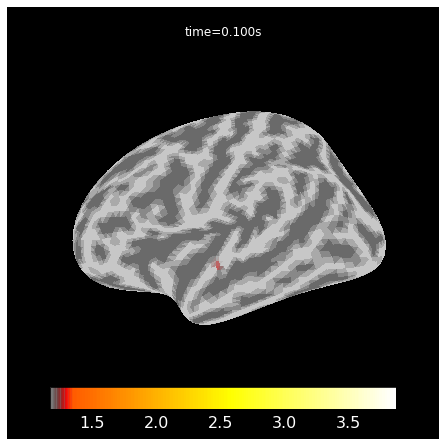

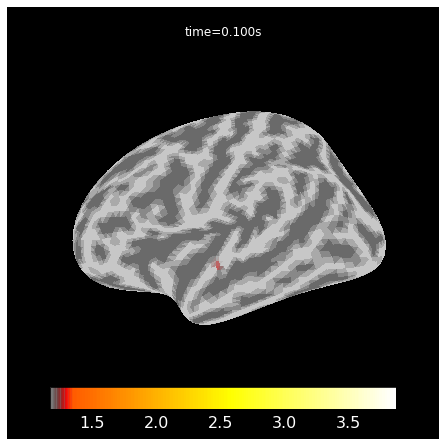

In [3]:
# Source space contrast
os.environ["SUBJECTS_DIR"] = subjects_dir
stc_aud = mne.read_source_estimate(
    op.join(meg_dir, 'aud_left_minus_right-grand_average-ave-stc'))

# mayavi provides better visualization
# stc_aud.plot(hemi='lh', initial_time=0.1)
stc_aud.magnitude().plot(hemi='lh', initial_time=0.1, backend='matplotlib')

Using control points [1.88050988 2.3134363  9.50980958]
Octahedron subdivision grade 6
    Triangle neighbors and vertex normals...
Loading geometry from /home/yuhan/Project/from-zero-to-source-estimates/subjects/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


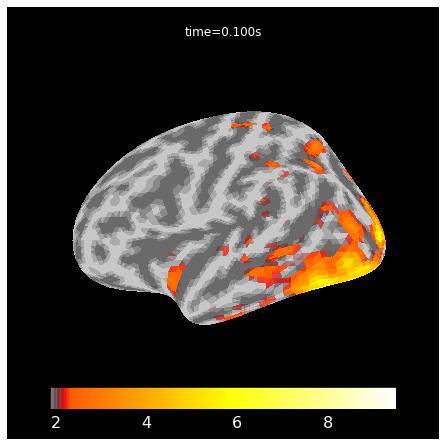

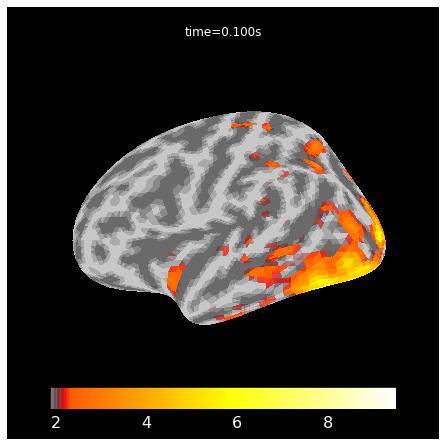

In [4]:
stc_vis = mne.read_source_estimate(
    op.join(meg_dir, 'vis_left_minus_right-grand_average-ave-stc'))
stc_vis.magnitude().plot(hemi='lh', initial_time=0.1, backend='matplotlib')